In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
X, y = make_blobs(centers=3, random_state=42)

In [3]:
import random

In [4]:
# Every cluster has a center point and points associated to it
class Cluster:
    # Each cluster has a center and points asscoiated to it
    def __init__(self, center):
        self.center = center
        self.points = []
    
    # Distance between cluster center and point
    def distance(self, point):
        return np.sqrt(np.sum((point - self.center)**2))
        
class CustomKMeans:
    # n_clusters OR K : number of clusters we assume. Can be determined by elbow method
    # max_iters       : default: 300. After each run of algo, center of cluster moves to the mean of the points. This basically controls 
    #                  number of times center of cluster shifts to the mean value
    # n_init          : default=10. Number of time the k-means algorithm will be run with different centroid seeds. i.e Initially we run 
    #                   the algorithm with random cluster centers. But those centers may be poor choice. Hence, run the KMeans with different
    #                   initial random choice
    def __init__(self, n_clusters=3, max_iters=20, n_init=10):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.n_init = n_init
        
    def fit(self, X):
        
        self._X = X
        steps = []
        
        # Run algo n_init times for different initial Random choice
        for simulation in range(self.n_init):
        
            # first we want to create clusters. This list contains the clusters[centre, associated points]
            clusters=[]
            # self.n_clusters: number of clusters we want to create
            for i in range(self.n_clusters):
                # cluster is object of class Cluster. We choose a random point from X as centre of cluster.
                # Initially, no points are associated with cluster centers
                cluster = Cluster(center=random.choice(X))
                # Each element in list is object of Cluster class or simply a Cluster
                clusters.append(cluster)

            errors = []
            
            # Run algo max_iter times to shift cluster center to the mean of that cluster points
            for i in range(self.max_iters):
                labels = []
                # ask each point in which cluster they will be 
                for point in X:
                    distances = []
                    # find distance of point from each cluster 
                    for cluster in clusters:
                        distances.append(cluster.distance(point))

                    # now find the minimum distance index
                    closest_idx = np.argmin(distances)
                    closest_cluster = clusters[closest_idx]
                    # add the poin to points list of closest cluster
                    closest_cluster.points.append(point)
                    # and add the label for the point
                    labels.append(closest_idx)
                
                # Take mean of all the points associated to a cluster center and assign it as the new cluster center
                for cluster in clusters:
                    cluster.center = np.mean(cluster.points, axis=0)
                
                # append the error for each max_iter OR each shift of center
                errors.append(self.error(labels,clusters))
       
            # for first(..second, third, ...n_iter) random choice of X, miminum error after max_iter iterations will be athe last index 
            final_error = errors[-1]
            # For First(..second, third, ...n_iter) steps, append the error, labels and clusters associated with that step
            steps.append((final_error,labels,clusters))
        
        # After all n_iter choices of random X, find which random choice of X was optimal
        index = np.array(steps)[:,0].argmin()
        result_err, result_labels, result_clusters = steps[index]
        
        self.labels = result_labels
        self.cluster_centers_= [cluster.center for cluster in result_clusters]
        
        return result_err
    
    def error(self, labels, clusters):
        error = 0
        
        for point, label in zip(self._X, labels):
            cluster = clusters[label]
            # error is distance between shifted cluster center and point
            error += cluster.distance(point)
            
        return error

In [5]:
random.choice(X)

array([-2.96983639, 10.07140835])

In [26]:
# Elbow method: Check with values of K or n_clusters from 2 to 6 to find ideal value of K
errors = []
for i in range(2,7):
    model = CustomKMeans(i, n_init=10)
    # model.fit returns the error for n_clusters =2, 3, 4, 5, 6 
    err = model.fit(X)
    # append those errors list
    errors.append(err)

E:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
E:\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [27]:
# as we can see error decreases as number of clusters are increasing
errors

[378.978567871971,
 117.64800966133762,
 107.0576981991484,
 100.74675749388659,
 91.81717808226985]

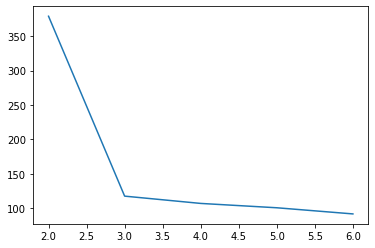

In [28]:
# Point of sharp drop is at 3.
# So ideal value of K is 3
plt.plot(np.arange(2,7),errors) 

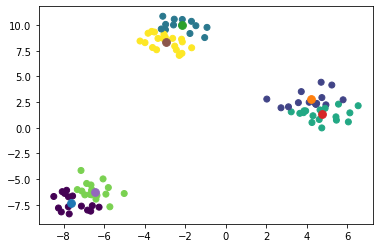

In [29]:
# As last iteration was for K=6, hence we have six clusters. 
# and six cluster centers
plt.scatter(X[:,0],X[:,1], c=model.labels)
for center in model.cluster_centers_:
   plt.scatter(center[0],center[1], s=60)

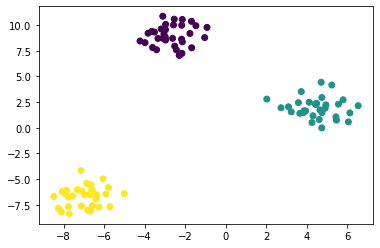

In [30]:
plt.scatter(X[:,0],X[:,1], c=y)